# Explore here

In [1]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [11]:
data.shape

(1338, 7)

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
data.duplicated().sum()

np.int64(1)

In [24]:
if data.duplicated().sum() > 0:
    data.drop_duplicates(inplace=True)
    print(f"Duplicated rows eliminated. New data set shape: {data.shape}")
else:
    print("Not ducplicated rows found.")

Duplicated rows eliminated. New data set shape: (1337, 7)


In [25]:
numeric_columns = ['age', 'bmi', 'children', 'charges']


--- Numeric Variables Analisis ---


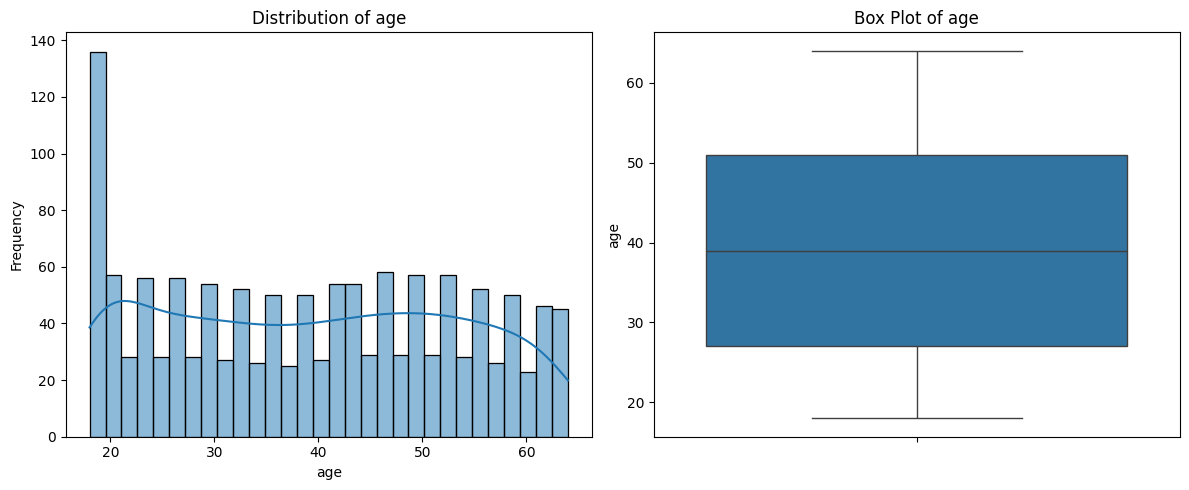

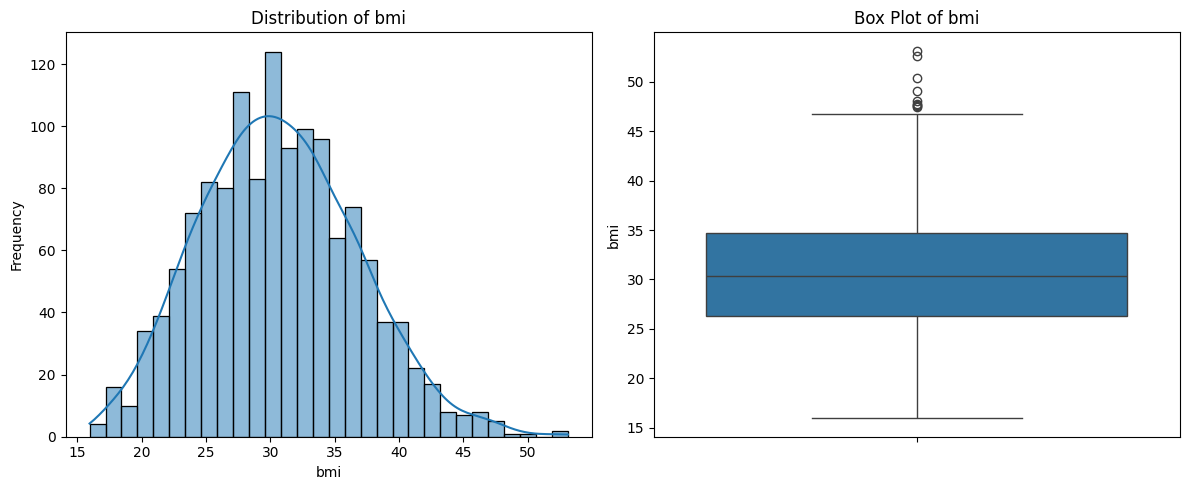

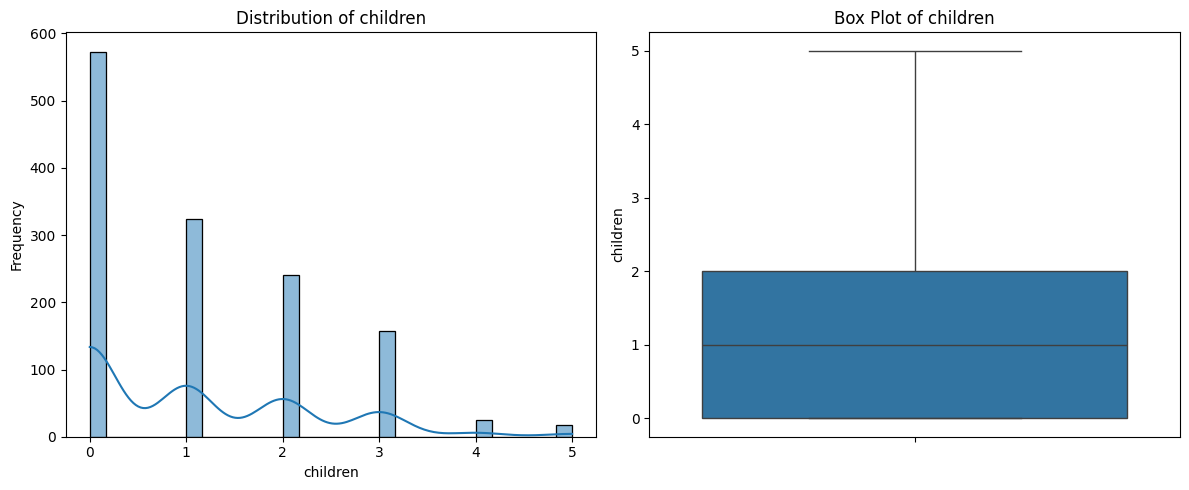

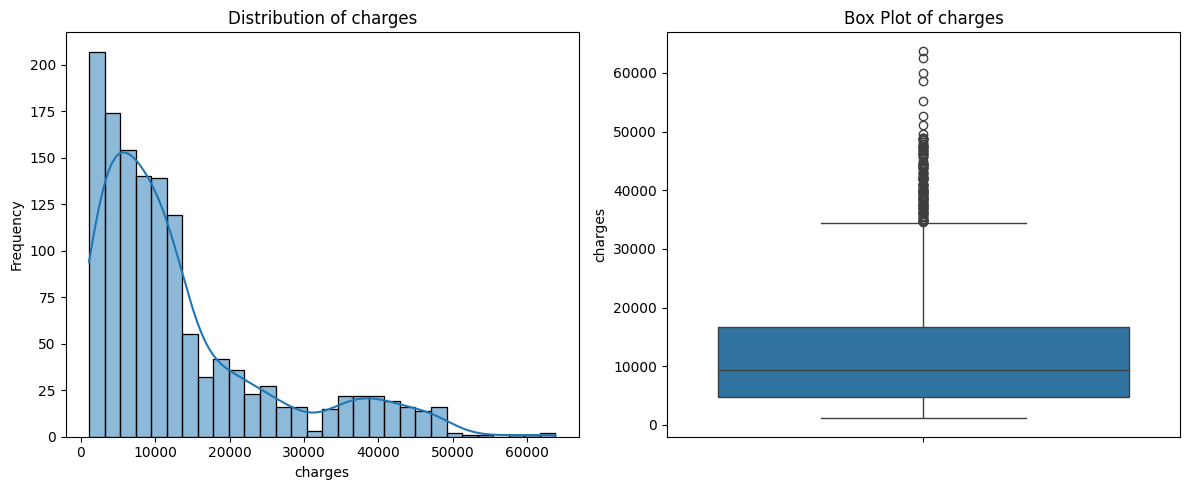

In [27]:
print("\n--- Numeric Variables Analisis ---")
for col in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


--- Categorical Variables Analisis ---


C:\Users\jorge\AppData\Local\Temp\ipykernel_26876\1270125353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


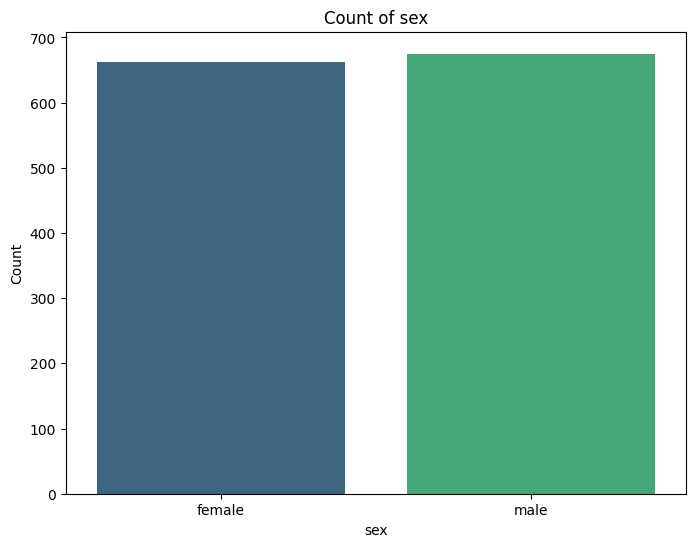


Count of values for 'sex':
sex
male      675
female    662
Name: count, dtype: int64


C:\Users\jorge\AppData\Local\Temp\ipykernel_26876\1270125353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


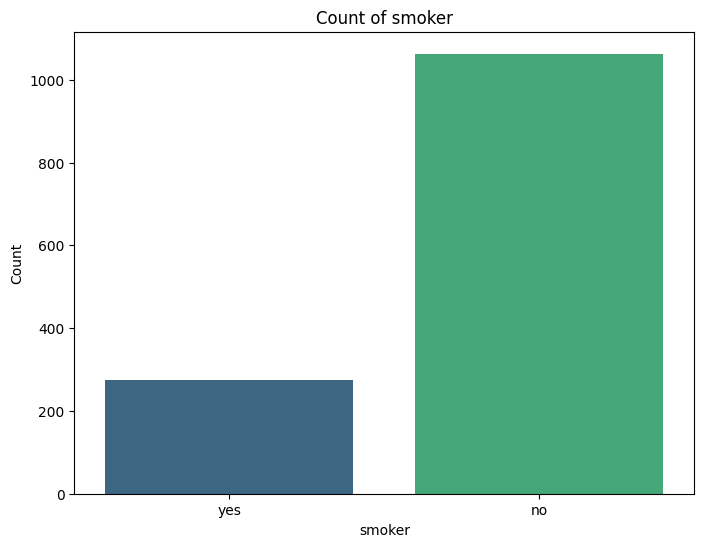


Count of values for 'smoker':
smoker
no     1063
yes     274
Name: count, dtype: int64


C:\Users\jorge\AppData\Local\Temp\ipykernel_26876\1270125353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


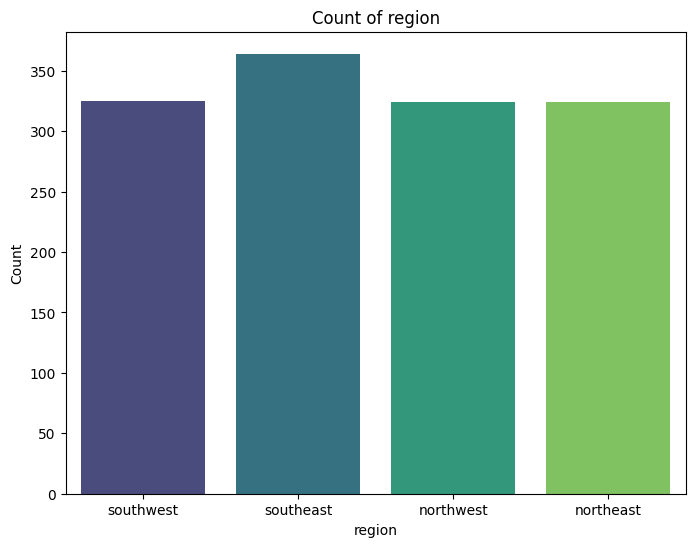


Count of values for 'region':
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [32]:
categorical_columns = ['sex', 'smoker', 'region']

print("\n--- Categorical Variables Analisis ---")
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data[col], palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    print(f"\nCount of values for '{col}':")
    print(data[col].value_counts())

               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


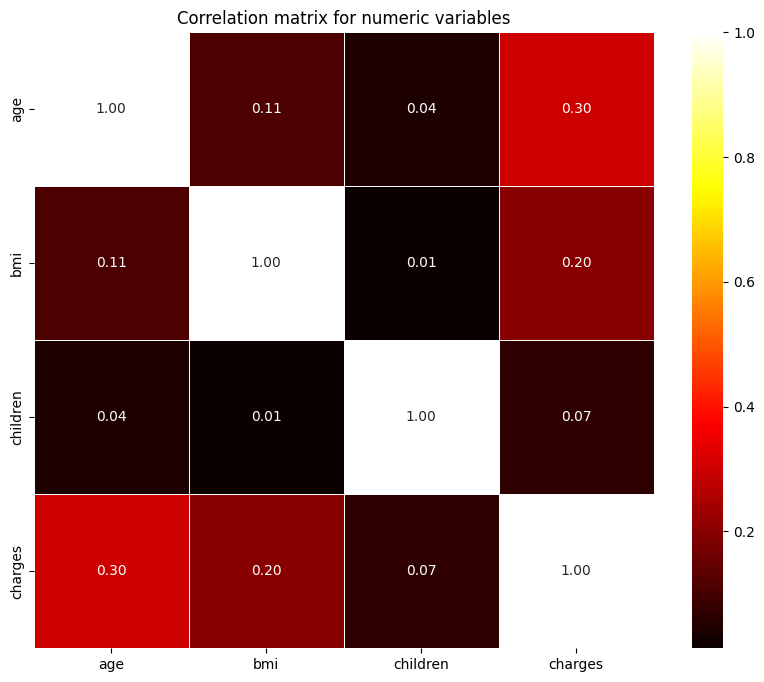

In [38]:
# Correlation matrix for numeric variables
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap= "hot", fmt=".2f", linewidths=.5)
plt.title('Correlation matrix for numeric variables')
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_26876\1122742916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['charges'], palette='husl')


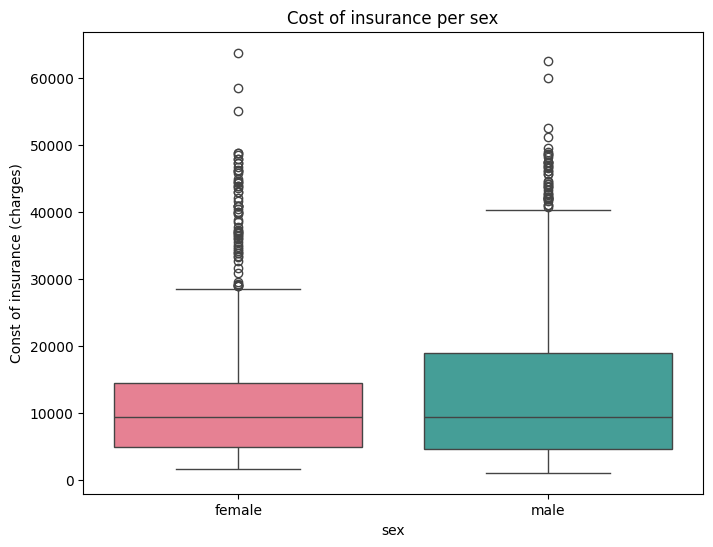

C:\Users\jorge\AppData\Local\Temp\ipykernel_26876\1122742916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['charges'], palette='husl')


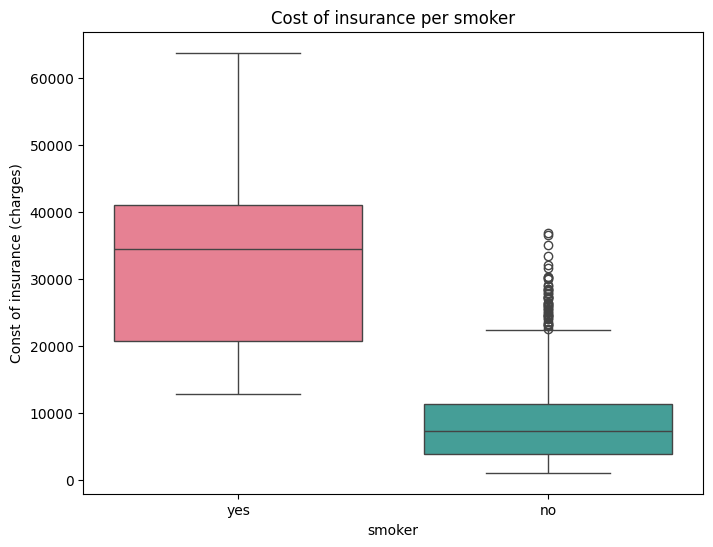

C:\Users\jorge\AppData\Local\Temp\ipykernel_26876\1122742916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['charges'], palette='husl')


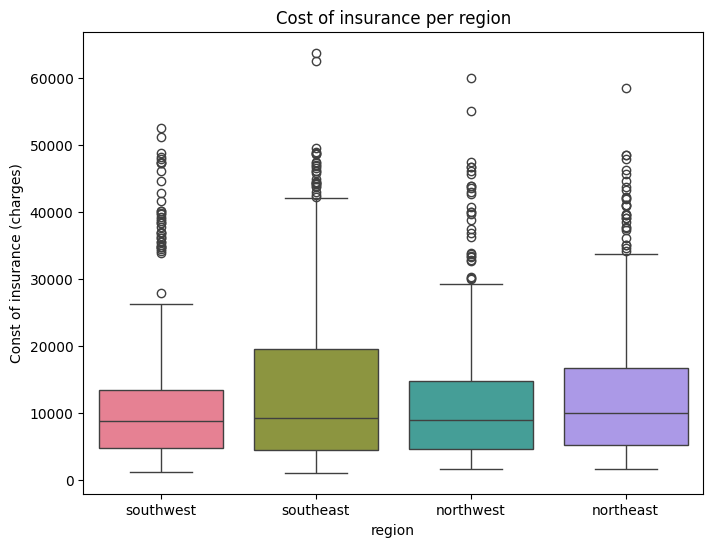

In [44]:
# Visualizing the relationship between numeric variables and charges
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col], y=data['charges'], palette='husl')
    plt.title(f'Cost of insurance per {col}')
    plt.xlabel(col)
    plt.ylabel('Const of insurance (charges)')
    plt.show()

In [50]:
data_dummies = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [51]:
data_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [52]:
X = data_dummies.drop('charges', axis=1)
Y = data_dummies['charges']

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [68]:
prediccions = model.predict(X_test)
#print(confusion_matrix(Y_test, predicciones))

In [69]:
predicciones

array([ 8.14369388e+03,  5.73711568e+03,  1.43693149e+04,  3.17455136e+04,
        8.96238666e+03,  1.31497224e+04,  3.04467607e+04,  1.45328881e+03,
        1.06330184e+04,  1.13189438e+04,  1.03778536e+04,  3.31184377e+04,
        3.10772527e+04,  1.74119253e+04,  1.08016743e+04,  9.52889964e+03,
        4.16103784e+03,  3.17315373e+04,  3.21938875e+03,  5.22992460e+03,
        3.54979004e+03,  3.02837740e+04,  1.48989509e+04,  3.04569093e+04,
        3.11077668e+04,  5.51196081e+03,  3.55030401e+04,  3.65704810e+04,
        1.14123133e+04,  1.42056990e+04,  6.50234029e+03,  1.27246945e+04,
        3.99806590e+02,  1.20883980e+04,  3.96592069e+04,  1.23395540e+04,
        4.74412279e+03,  3.91903157e+03,  3.08606789e+04,  8.95870663e+03,
        7.05389441e+03,  3.01125636e+04,  3.47804324e+04,  1.22916189e+04,
        7.35739310e+03,  3.42060530e+03,  6.21243471e+03,  8.98345200e+03,
        4.26401828e+03,  9.01992870e+03,  6.60149578e+03,  1.20802337e+04,
        3.12447687e+04,  

In [70]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, Y_test))

-11092.652295945965
[  248.21072022   318.70144095   533.0099888   -101.54205399
 23077.76459287  -391.76145478  -838.91961573  -659.13975155]
0.8069287081198012


In [72]:
Y_test_array = Y_test.values
print("\n--- First 5 comparison real vs preditc ---")
for i in range(5): 
    print(f"Real: {Y_test_array[i]:.2f}, Prediccion: {prediccions[i]:.2f}, Error: {abs(Y_test_array[i] - predicciones[i]):.2f}")

# 2. Calcular y mostrar las métricas de evaluación
mae = mean_absolute_error(Y_test, prediccions)
mse = mean_squared_error(Y_test, prediccions)
rmse = np.sqrt(mse) # Calcula la raíz cuadrada del MSE
r2 = r2_score(Y_test, prediccions)

print("\n--- Model Metrics ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


--- First 5 comparison real vs preditc ---
Real: 8688.86, Prediccion: 8143.69, Error: 545.16
Real: 5708.87, Prediccion: 5737.12, Error: 28.25
Real: 11436.74, Prediccion: 14369.31, Error: 2932.58
Real: 38746.36, Prediccion: 31745.51, Error: 7000.84
Real: 4463.21, Prediccion: 8962.39, Error: 4499.18

--- Model Metrics ---
MAE: 4177.05
MSE: 35478020.68
RMSE: 5956.34
R^2: 0.81
